# A/B Testing Assignment

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
# create a function to calculate a 95% confidence interval for a single variable
def confidence_95_ind(aList):
  interval = st.t.interval(0.95, len(aList) - 1, loc=np.mean(aList), scale=st.sem(aList))
  return interval

In [ ]:
# create a function to sample the means of a list
def mean_sampler(aList):
  sampleMeans = []
  for _ in range(10000):
    samples = aList.sample(n=100)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)
  return sampleMeans

In [ ]:
# create a function to calculate the 95% confidence interval for the difference 
# in means for two variables
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

### Import the [Absenteeism at Work data set](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv). 

**Note:** The the delimiter of the file is a semi-colon (;), so you will need to set `sep=';`.

In [ ]:
# read the data
url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv'

df = pd.read_csv(url, sep=';')
print(df.columns)
print(df.shape)
print(df.describe())
df.head(2)


Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')
(740, 21)
               ID  ...  Absenteeism time in hours
count  740.000000  ...                 740.000000
mean    18.017568  ...                   6.924324
std     11.021247  ...                  13.330998
min      1.000000  ...                   0.000000
25%      9.000000  ...                   2.000000
50%     18.000000  ...                   3.000000
75%     28.000000  ...                   8.000000
max     36.000000  ...                 120.000000

[8 rows x 21 columns]


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0


## Confidence Intervals

Suppose this company is analyzing the health of its employees and is specifically interested in their Body Mass Index (BMI). Generate a 95% confidence interval of the mean for that field.

In [ ]:
# isolate the 'Body mass index' column and store in a variable 'a'
a = df['Body mass index']
confidence_95_ind(a)

(26.367754917159168, 26.986299136894885)

### Visualizing Confidence Intervals

Generate a sampling distribution of the mean for the Body Mass Index field. Create a histogram to visualize the sampling distribution and add an indicator showing the lower and upper bounds of the confidence interval.

(array([2.000e+00, 7.500e+01, 4.480e+02, 1.457e+03, 2.747e+03, 2.917e+03,
        1.703e+03, 5.340e+02, 1.100e+02, 7.000e+00]),
 array([25.1  , 25.411, 25.722, 26.033, 26.344, 26.655, 26.966, 27.277,
        27.588, 27.899, 28.21 ]),
 <a list of 10 Patch objects>)

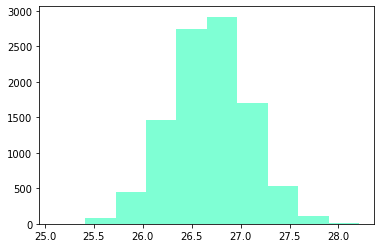

In [ ]:
# use the function mean_sampler to get sample means to form a histogram
bmi_sample_means = mean_sampler(a)
plt.hist(bmi_sample_means, color='aquamarine')

### Confidence Intervals by Group

Suppose we wanted to examine whether there was a difference in the BMIs of employees who drink socially and those that do not. Use the Social Drinker field to split the employees into groups, and then compute the confidence intervals for each group. What insights can you derive from the results?

In [ ]:
# split the BMI column into two groups: drinkers and non_drinkers
drinkers = df[df['Social drinker'] == 1]
non_drinkers = df[df['Social drinker'] == 0]

# isolate the columns 'Body mass index' for drinkers and non-drinkers and store 
# them in variables 'b' and 'c', respectively
b = drinkers['Body mass index']
c = non_drinkers['Body mass index']

# calculate the 95% confidence interval for each variable
drinkers_95_interval = confidence_95_ind(b)
non_drinkers_95_interval = confidence_95_ind(c)

# print the intervals
print(drinkers_95_interval)
print(non_drinkers_95_interval)

(27.49904991718434, 28.27714055900614)
(24.641171070136533, 25.533828929863464)


*From these results, we can gather that the intervals of BMI for drinkers is on average, larger thank the BMI of non_drinkers*

### Sampling Distributions for Each Group

Next, let's generate a sampling distribution of the mean for each group and generate a plot containing both of their histograms to see if there is any overlap.

In [ ]:
# collect sample means for each variable and store them in variables
drinkers_meanSamples = mean_sampler(b)
non_drinkers_meanSamples = mean_sampler(c)


<function matplotlib.pyplot.show>

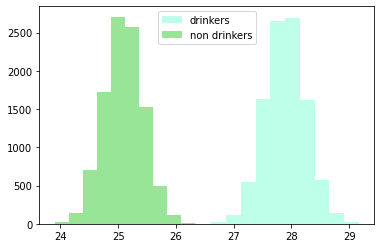

In [ ]:
# plot the histograms and create a legend
plt.hist(drinkers_meanSamples, alpha=.5, color='aquamarine')
plt.hist(non_drinkers_meanSamples, alpha=.5, color='limegreen')
plt.legend(['drinkers', 'non drinkers'])
plt.show

## A/B Testing

Based on our analysis so far, we would like to perform a t-test to determine whether there is a difference in BMI means between our two groups (social drinkers and non-social drinkers). Conduct an independent sample t-test and determine whether the differences between the groups is statistically significant. What is your conclusion?

In [ ]:
# run a t-test for the variables
stats.ttest_ind(b, c)

Ttest_indResult(statistic=9.302990833389606, pvalue=1.5203894201359724e-19)

## Confidence Intervals for Group Differences

Generate a 95% confidence interval for the mean difference in BMI between the two groups. Compute the interval using both the traditional method and bootstrapping and compare the results. What conclusions can you draw from the comparison? How would you present a summary of your results to stakeholders?

In [54]:
# run a 95% confidence interval for the mean difference in BMI between the two 
# groups using the traditional method
print('Traditional: ')
get_95_ci(drinkers['Body mass index'], non_drinkers['Body mass index'])

Traditional: 


'The difference in means at the 95% confidence interval (two-tail) is between -3.390677184812264 and -2.2105132913782177.'

In [55]:
from statistics import mean
# run a 95% confidence interval for the mean difference in BMI between the two 
# groups using the bootstrapping method
print('Bootstrapping:')
#get_95_ci(sd_y_mean,sd_n_mean)
def get_95_ci_bootstrap(data1, data2):
    sample_1_n = len(data1)
    sample_2_n = len(data2)
    sample_1_mean = mean(data1)
    sample_2_mean = mean(data2)
    sample_1_var = np.var(data1)
    sample_2_var = np.var(data2)
    mean_diff = sample_2_mean - sample_1_mean
    std_err_diff = math.sqrt((sample_1_var/sample_1_n) + (sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_diff
    ci_lower = mean_diff - margin_of_error
    ci_upper = mean_diff + margin_of_error
    return(f'The difference in means at the 95% confidence interval (two-tail) is between {round(ci_lower, 4)} and {round(ci_upper, 4)}')

get_95_ci_bootstrap(drinkers_meanSamples, non_drinkers_meanSamples)

Bootstrapping:


'The difference in means at the 95% confidence interval (two-tail) is between -2.8113 and -2.7924'